# Predict Price Of Diamond 

# 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error


# 2.Import Dataset

In [2]:
df=pd.read_csv('diamonds.csv')
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

The educational data set we have includes 10 columns, the descriptions of each column are given in the table below :

1.CARAT:Diamond weight in carats|
2.CUT:|Diamond cutting quality|
3.COLOR:|Color of Diamond from J(The worst) to D(The best)| 
4.CLARITY:|Diamond clarity rating from worst to best (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)|
5.X:|Diamond length in millimeters|
6.Y:|Diamond width in millimeters| 
7.Z:|Diamond depth in millimeters| 
|The percentage depth that is equal to: z / mean(x,y)|depth| |The width of the widest point of the Diamond|table|
8.PRICE:|Diamond Price|

# 3. Overview¶

In [3]:
df.shape

(53940, 11)

In [4]:
display(df.head())
display(df.tail())

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [5]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

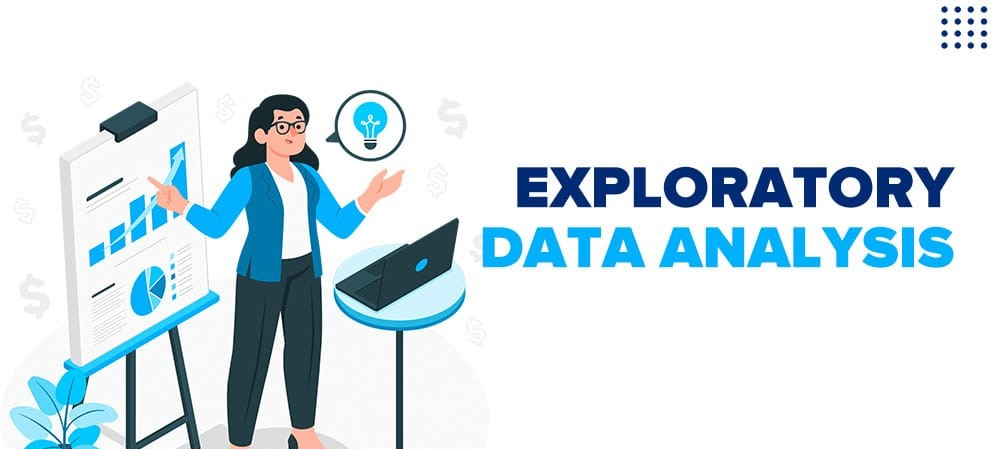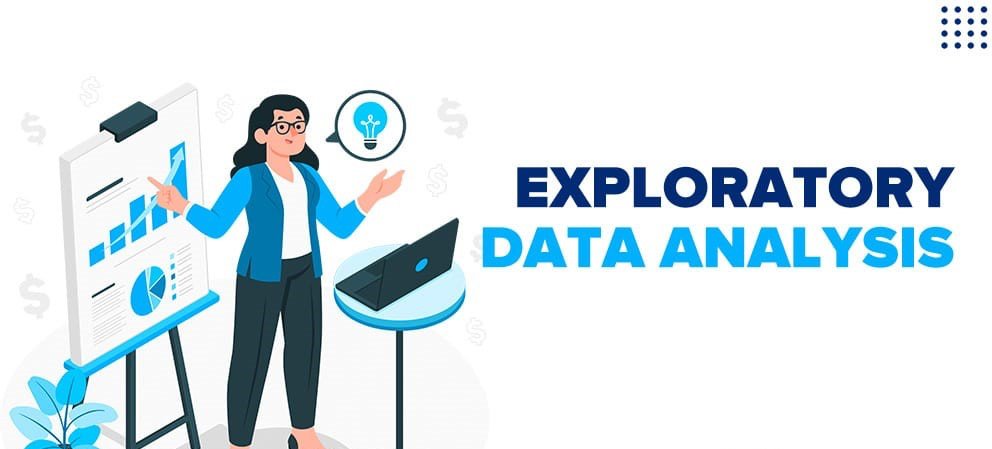

# EXPLORATORY DATA ANALYSIS

* EDA allows us to explore the data's characteristics, patterns, and outliers, facilitating the identification of 
  crucial factors contributing to accidents. 

* Through visualizations and analysis of numerical, categorical, and time-related variables, EDA allows for the 
  identification of correlations, anomalies, and potential data quality issues, providing a solid foundation for
  subsequent modeling and decision-making in the aviation industry.
  
* EDA can uncover patterns and trends in different types of aviation accidents, such as crashes, collisions, or runway 
  incidents. It allows for the identification of common factors or circumstances contributing to these accidents, 
  including weather conditions, pilot error, mechanical failures, or specific phases of flight.

# 2. Data Cleaning

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

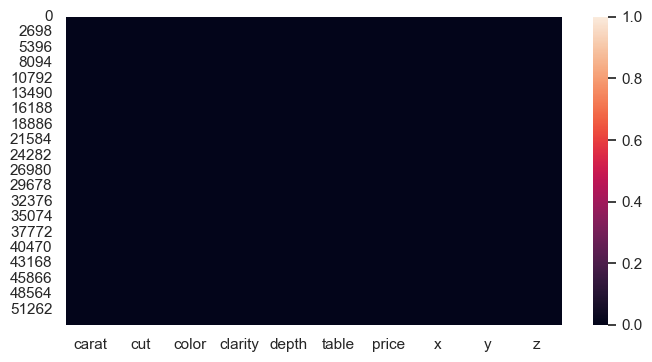

In [10]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(df.isnull(), vmin = 0, vmax = 1)

plt.show()

In [11]:
df.loc[df.duplicated()]

carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]

In [12]:
df.shape

(53940, 10)

In [13]:
df['cut'].nunique()

5

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(inplace=True)

In [16]:
df.shape

(53940, 11)

In [17]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

# DATA VISUALIZATION

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: >

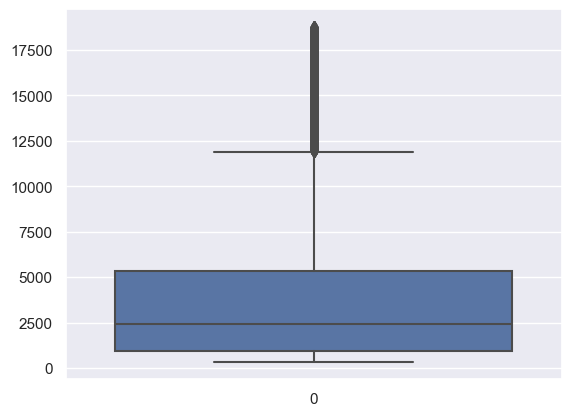

In [19]:
sns.boxplot(df.price)

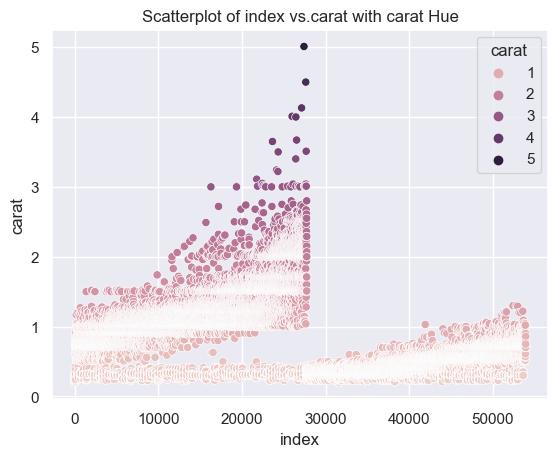

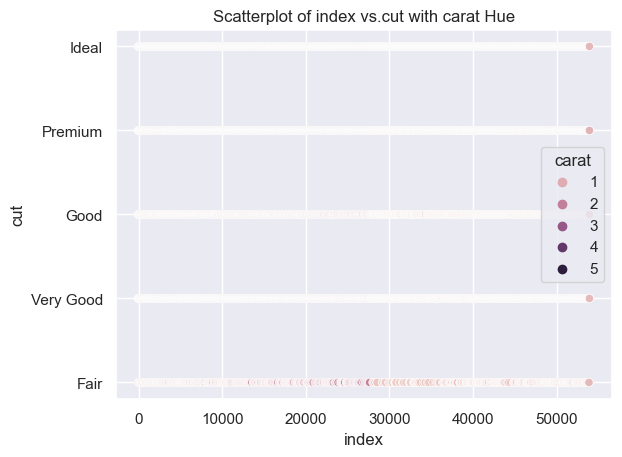

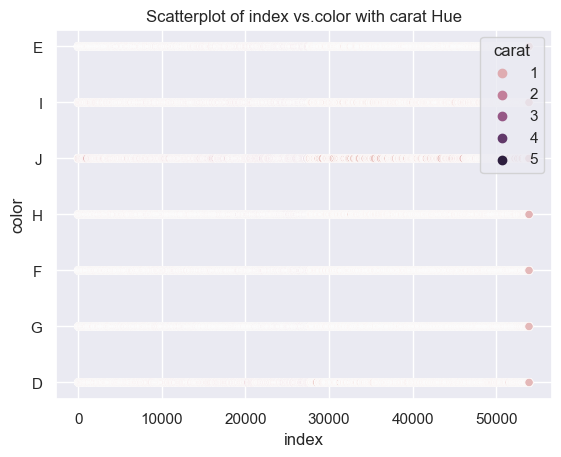

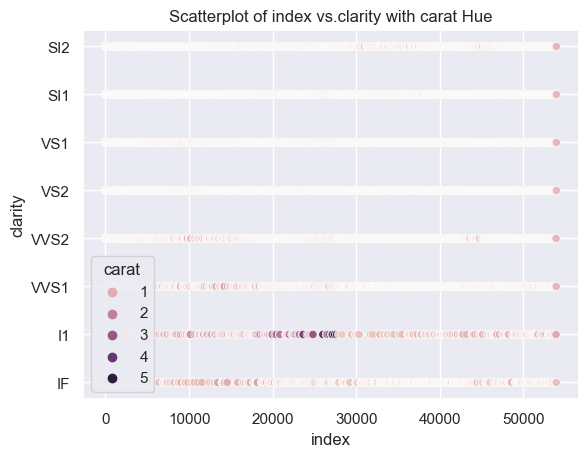

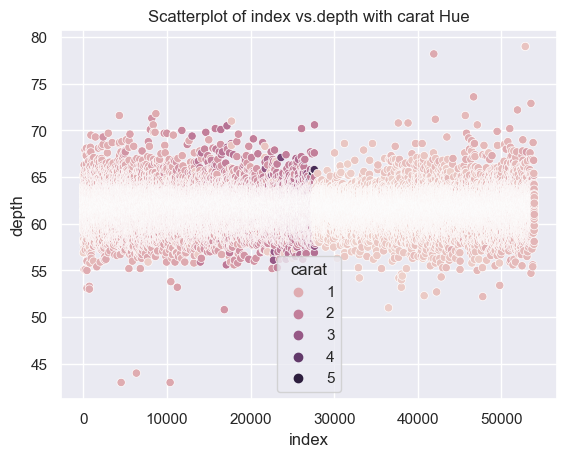

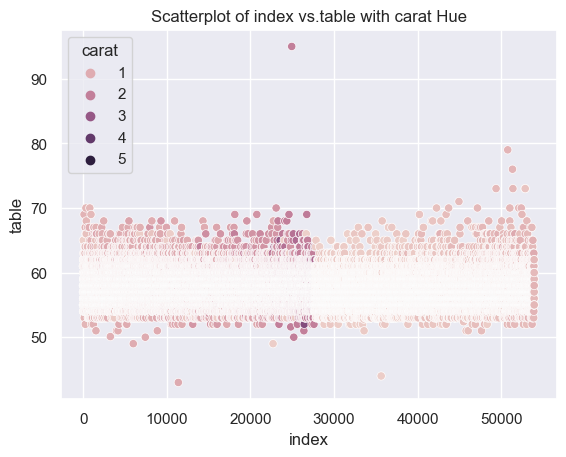

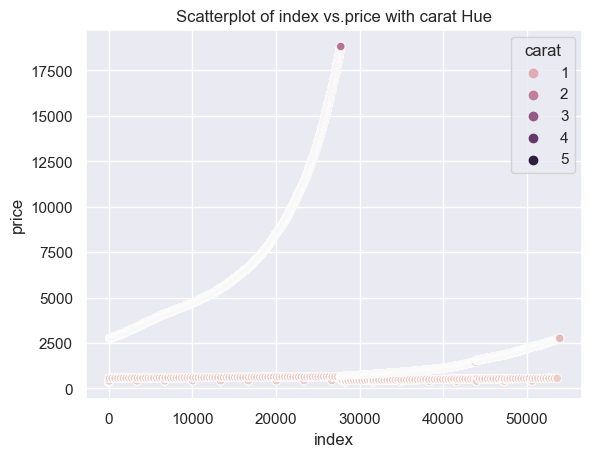

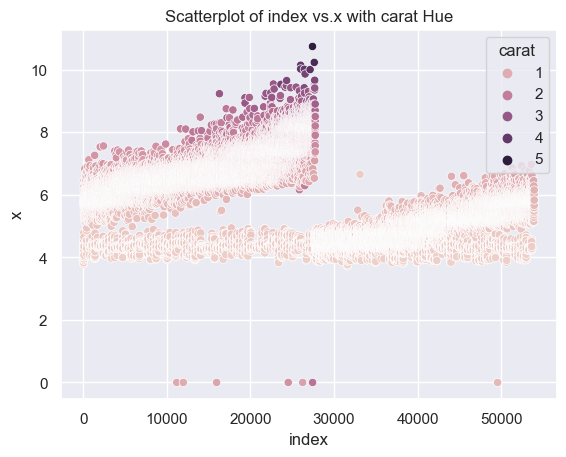

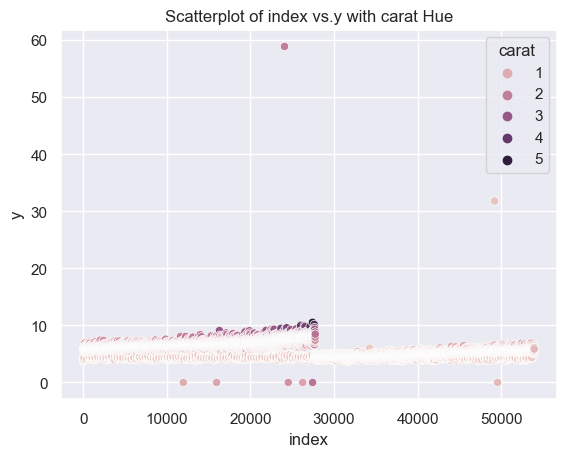

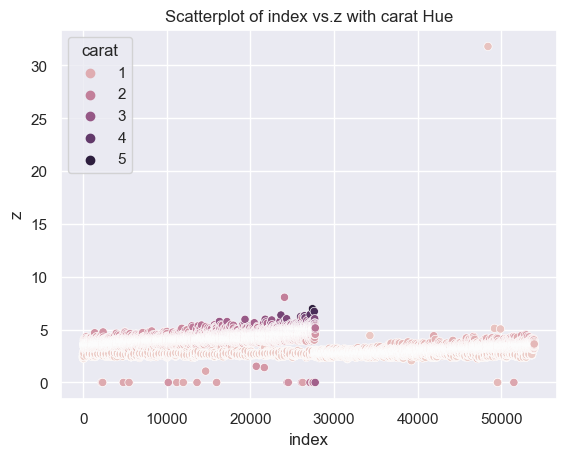

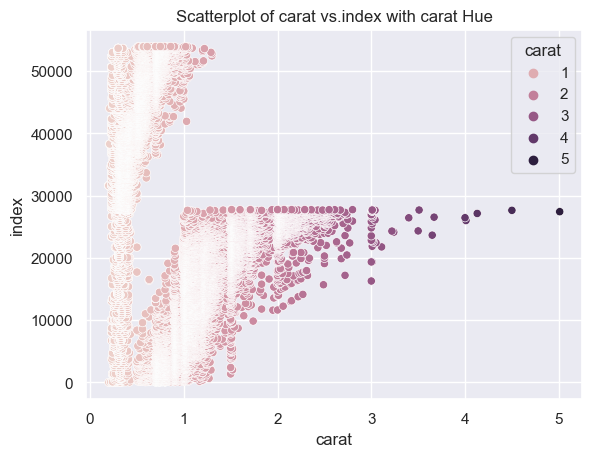

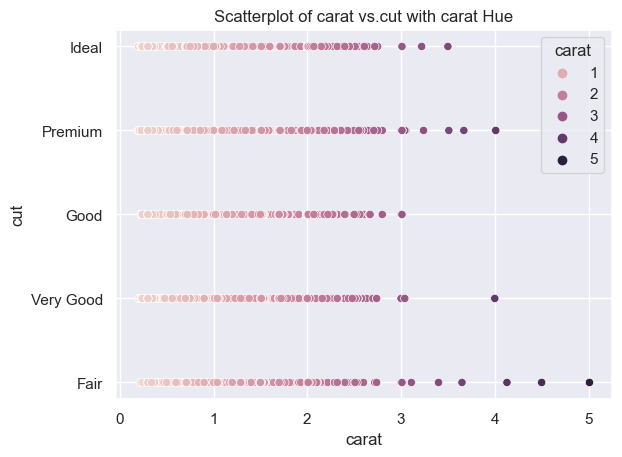

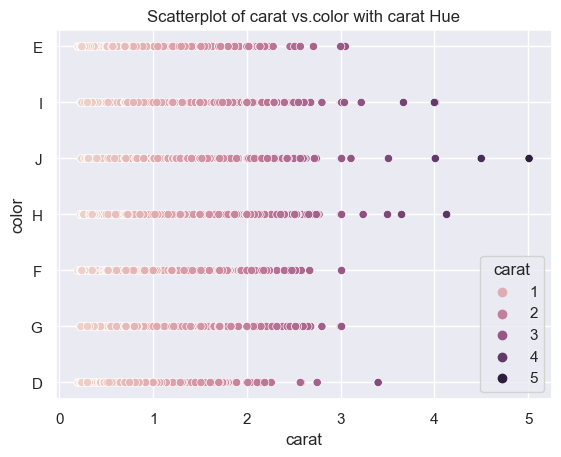

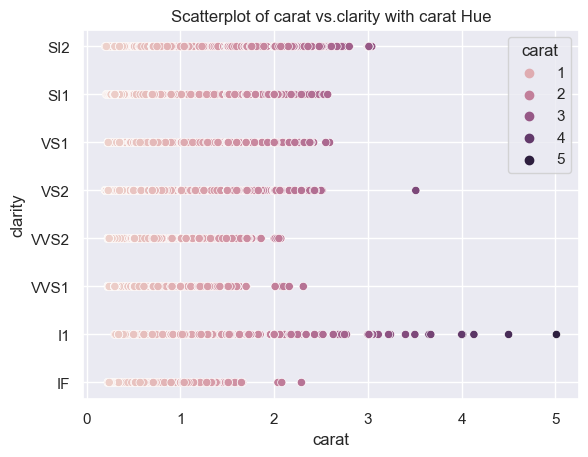

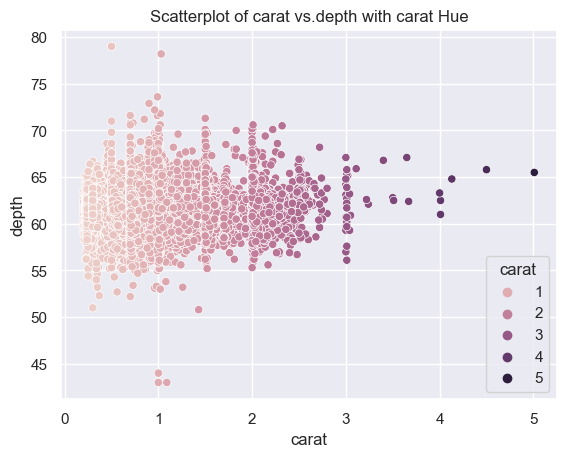

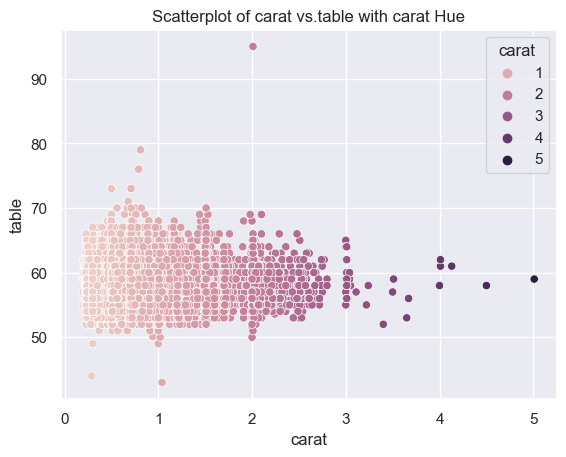

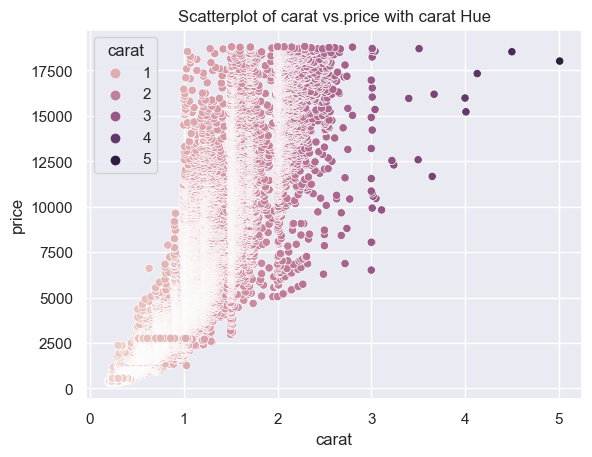

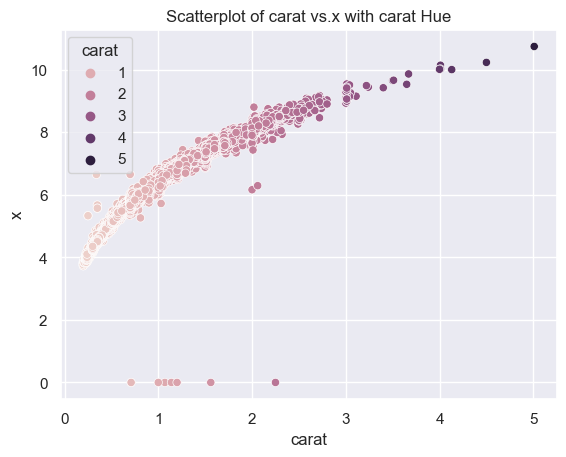

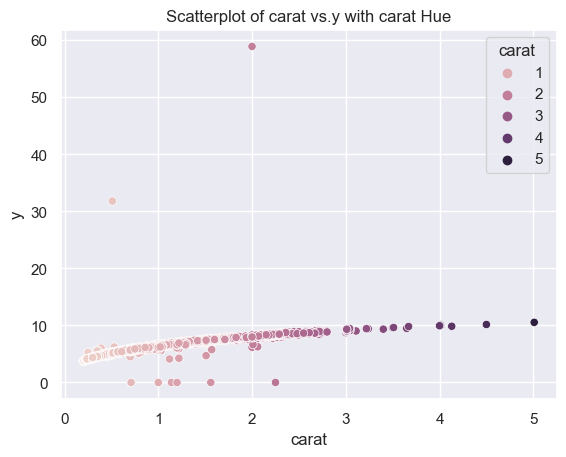

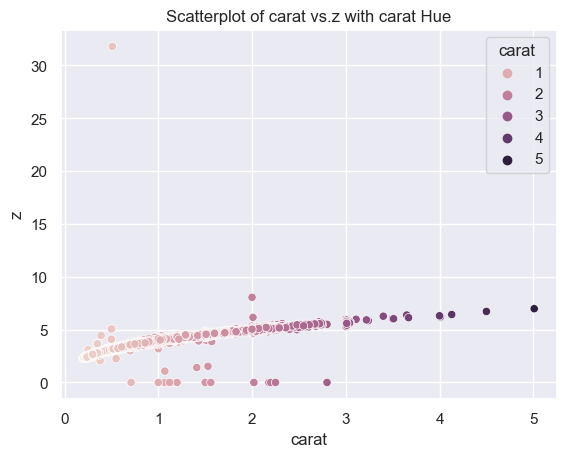

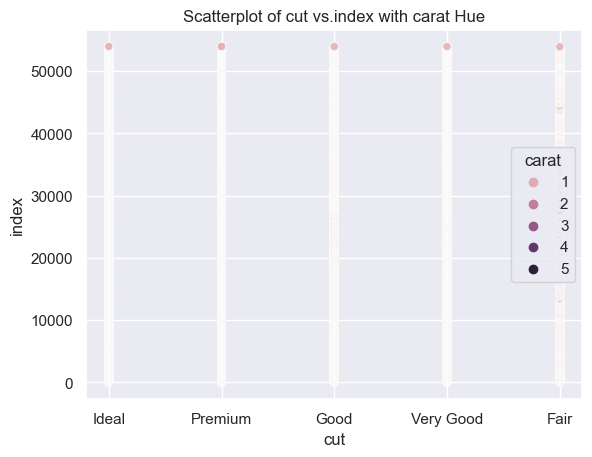

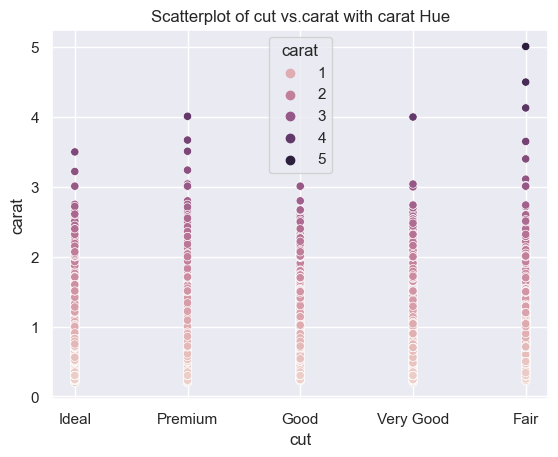

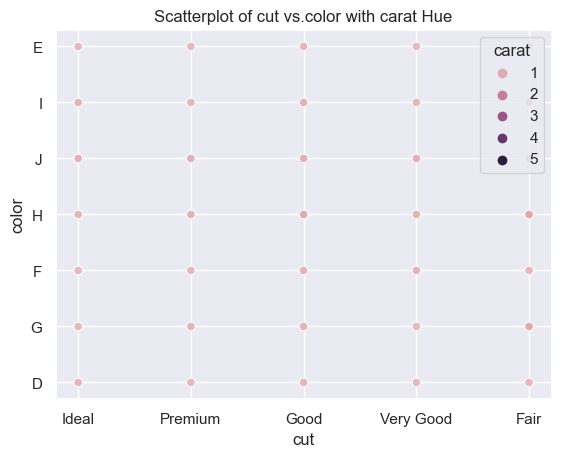

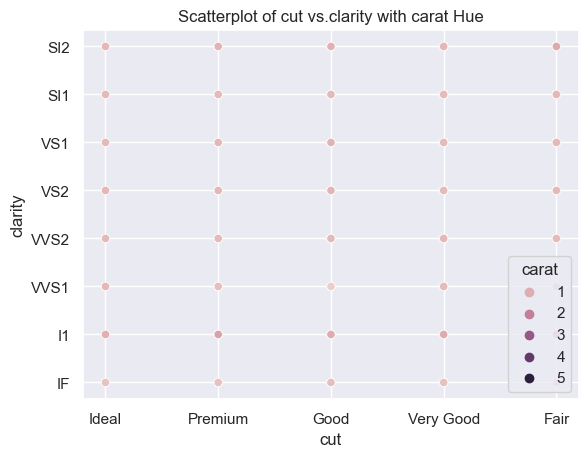

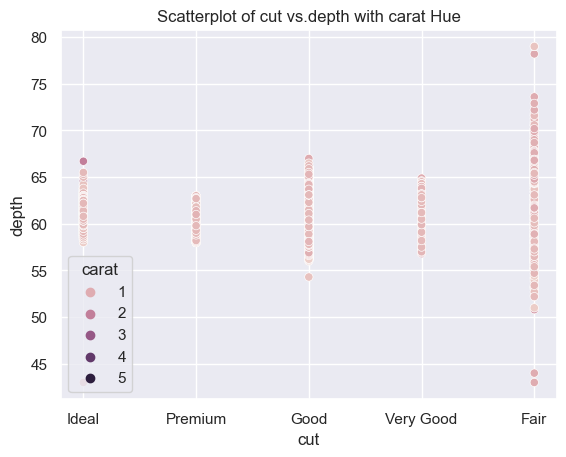

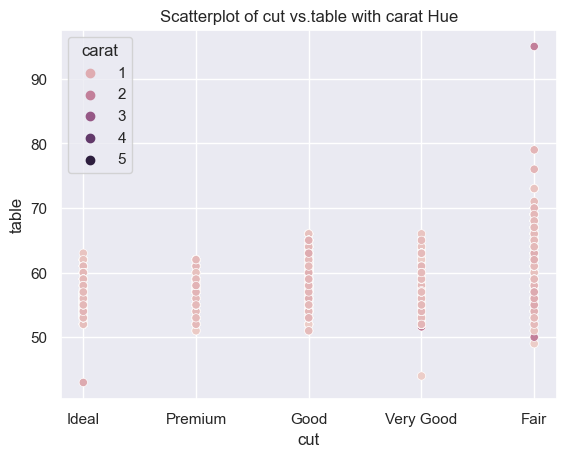

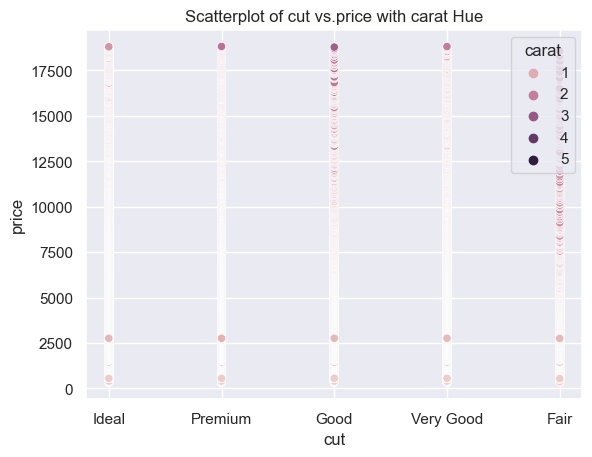

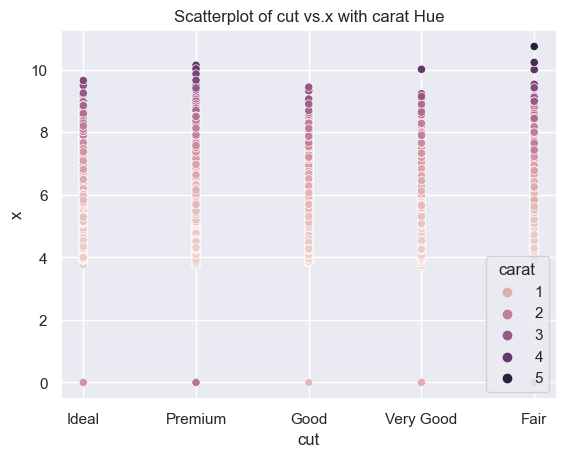

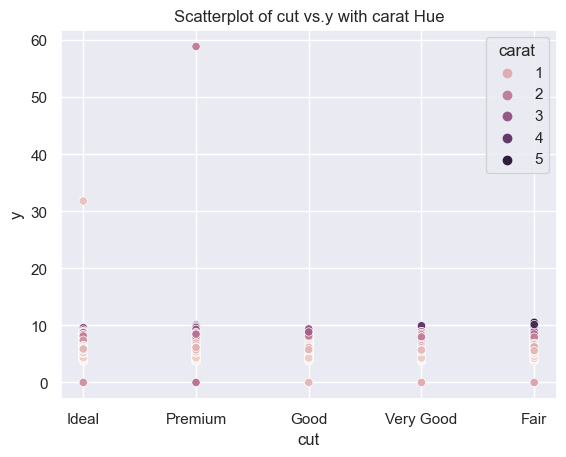

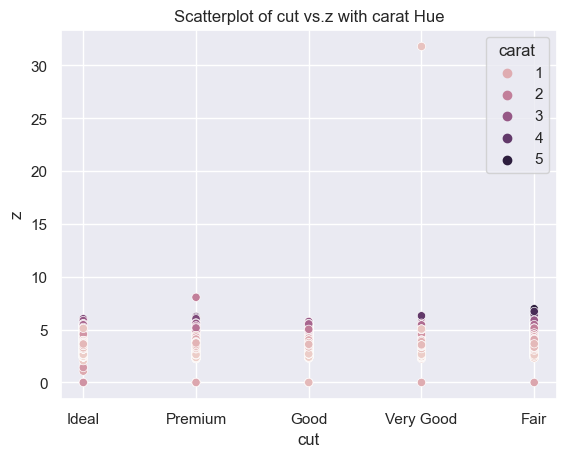

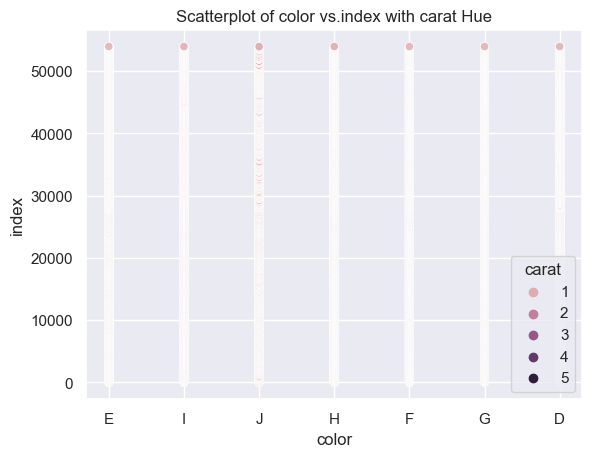

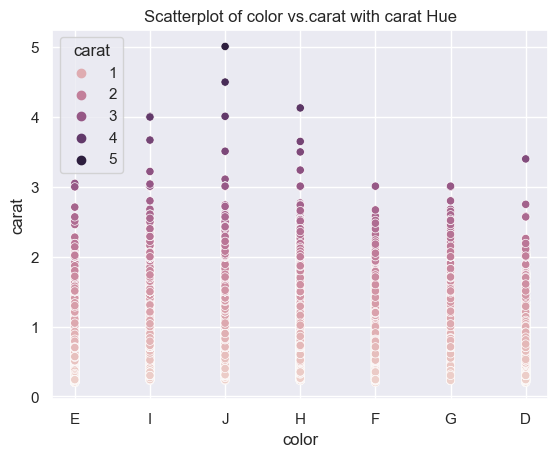

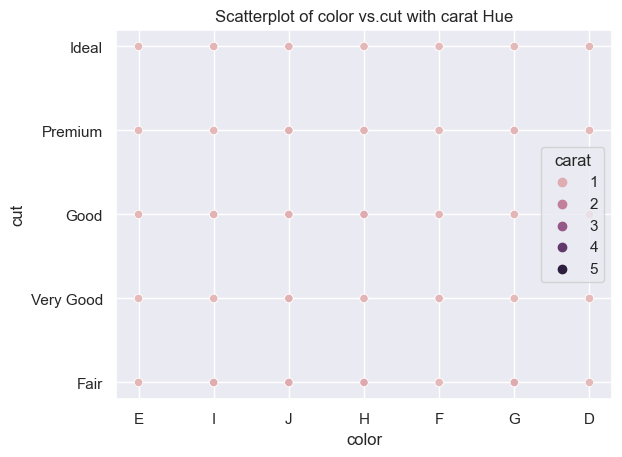

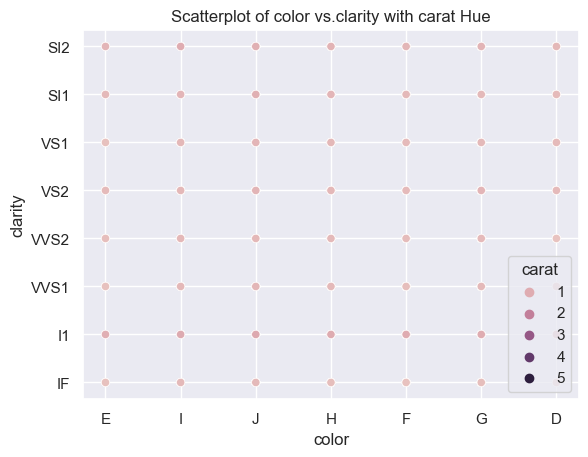

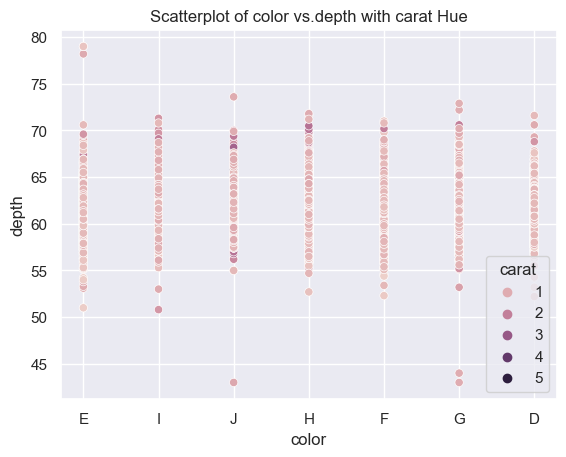

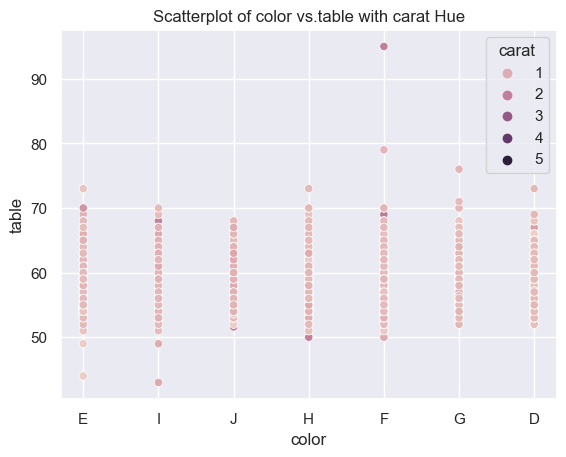

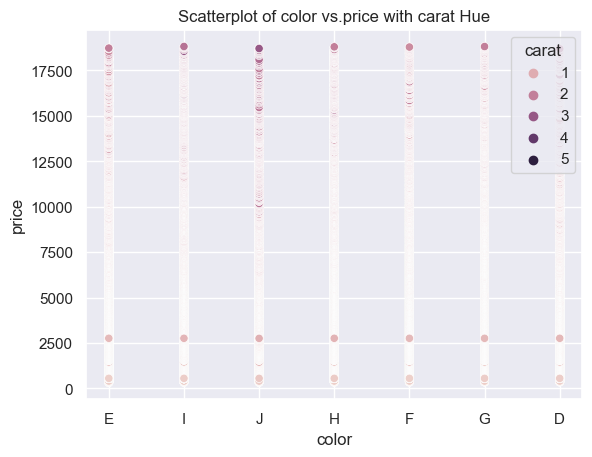

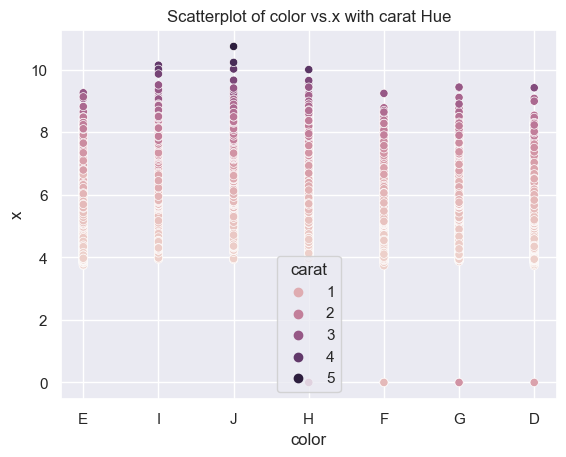

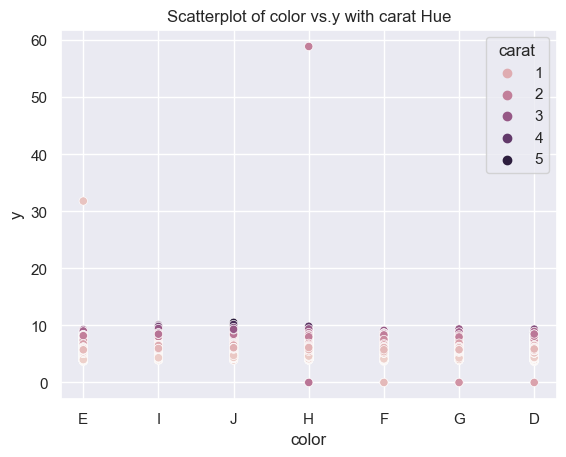

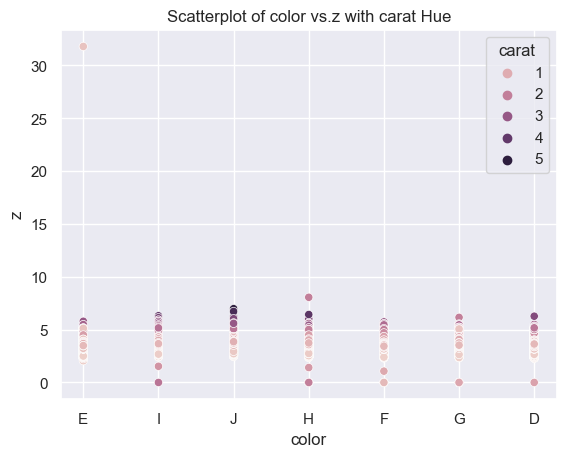

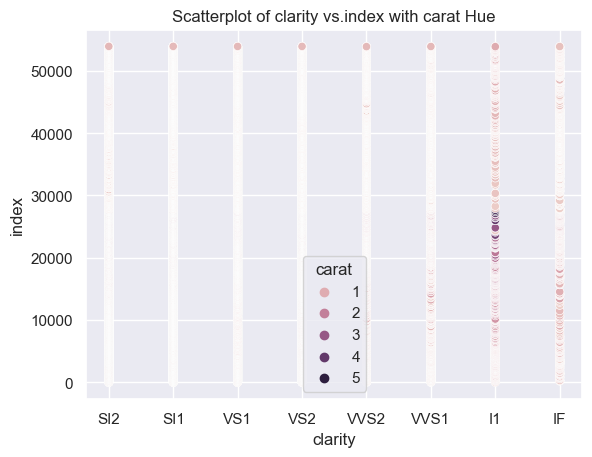

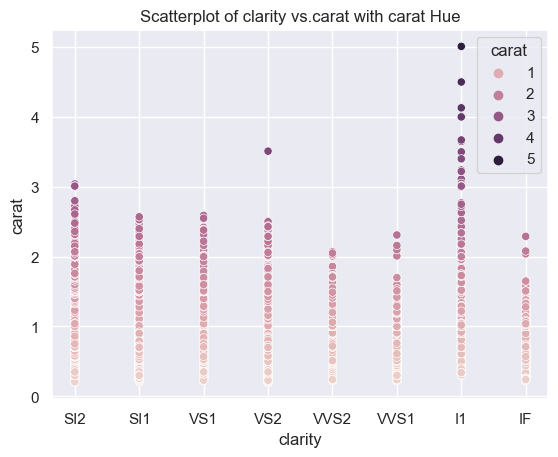

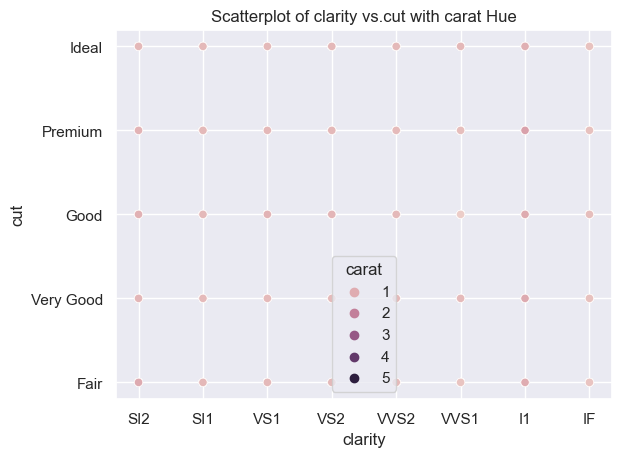

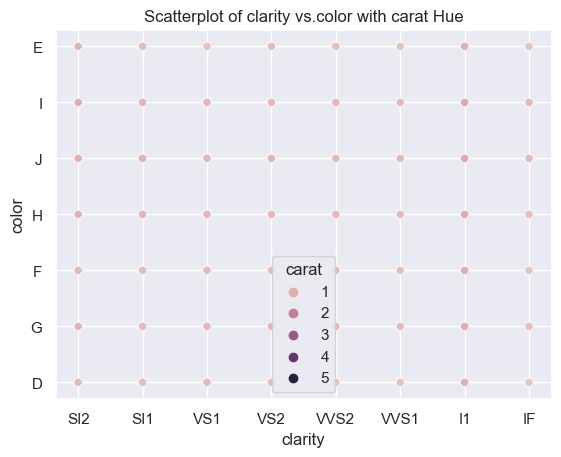

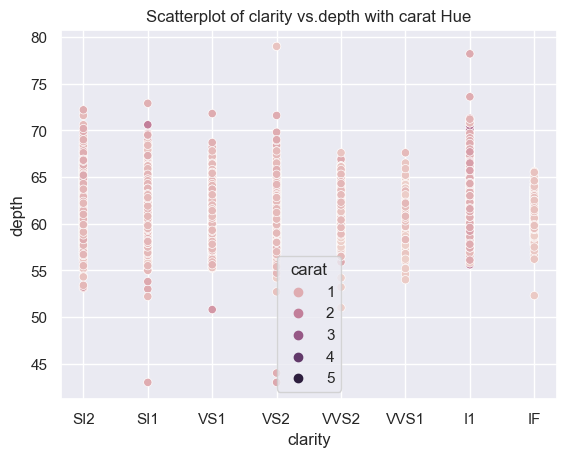

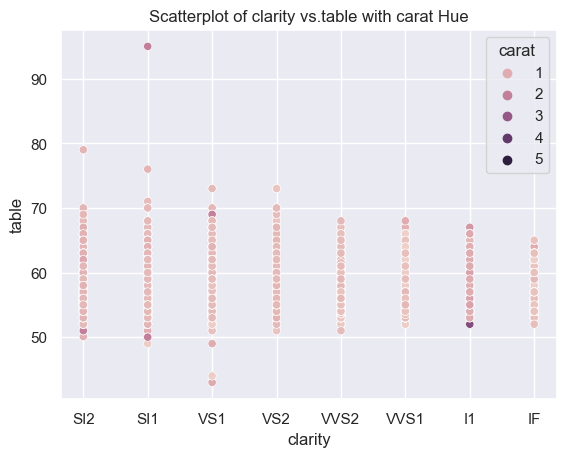

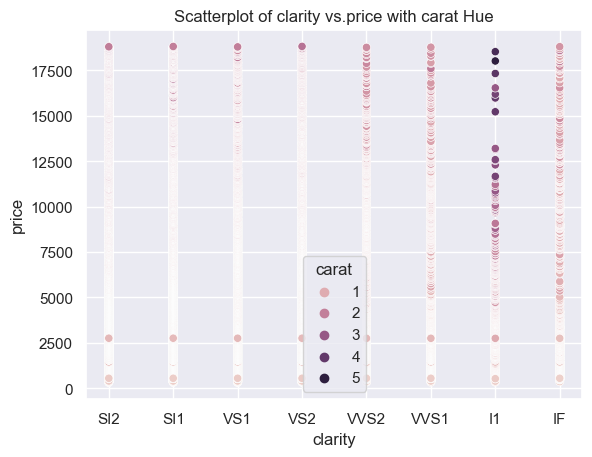

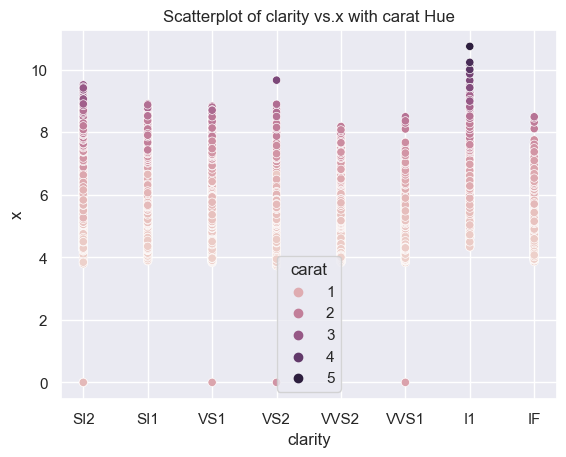

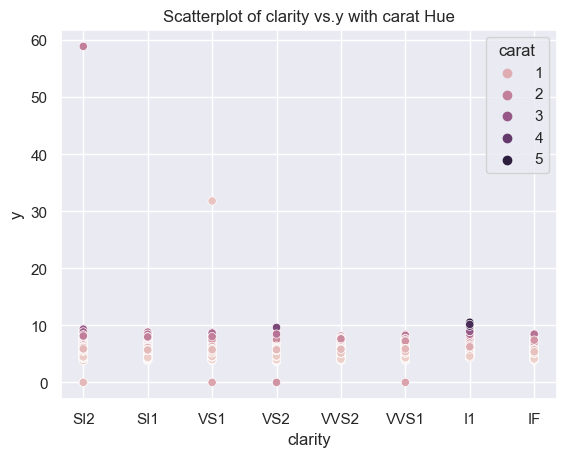

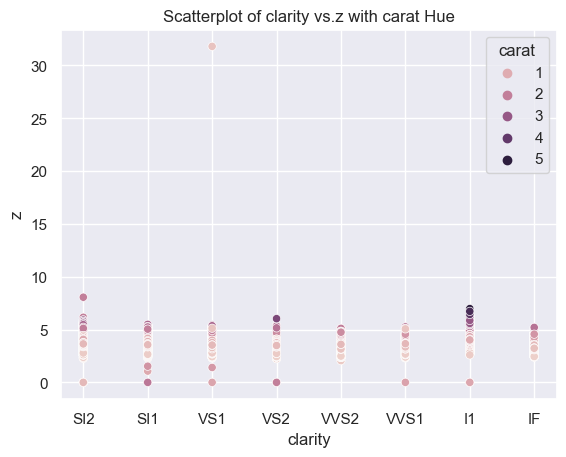

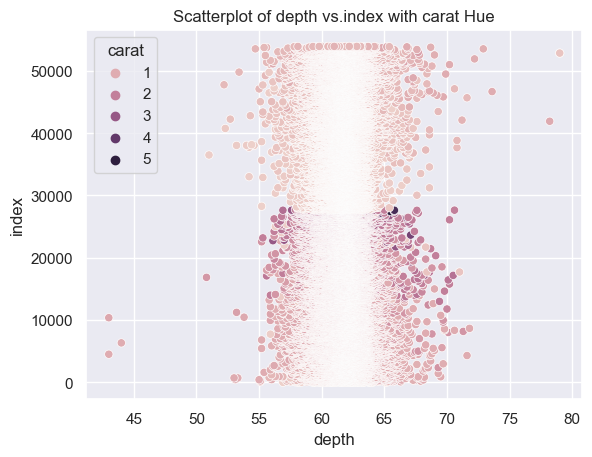

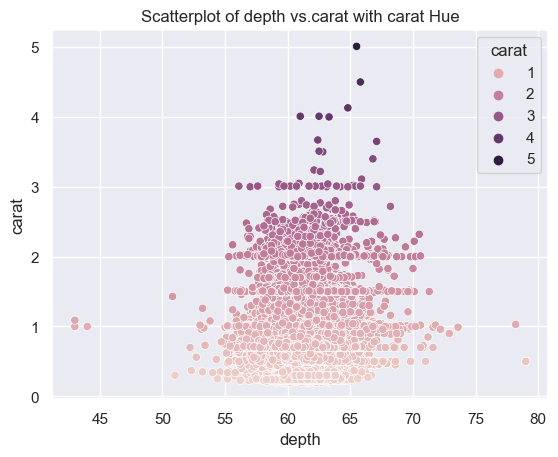

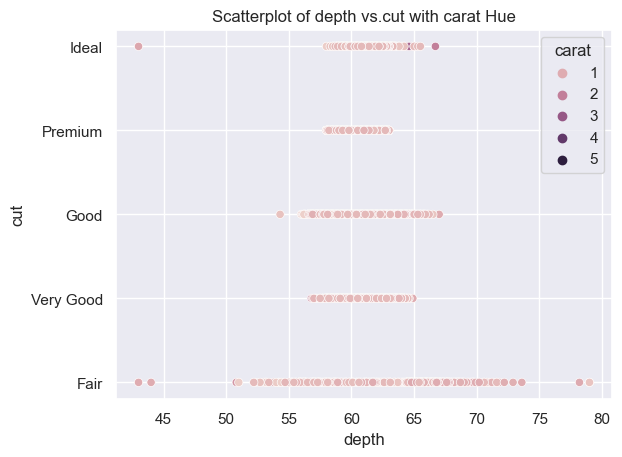

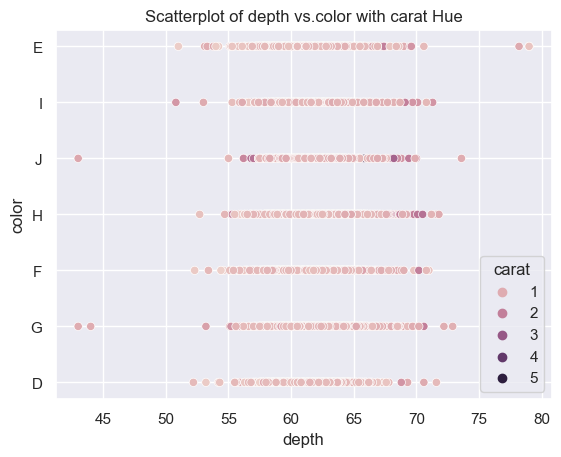

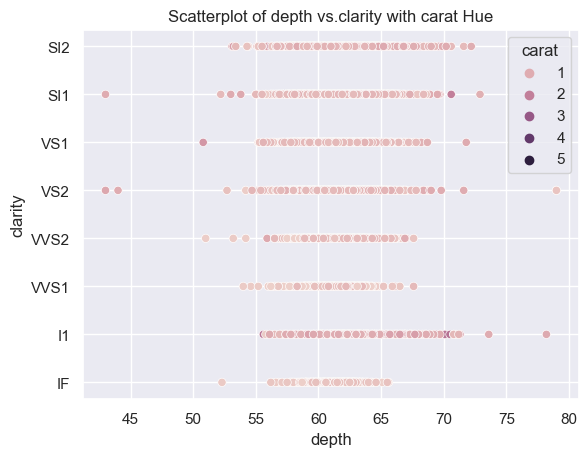

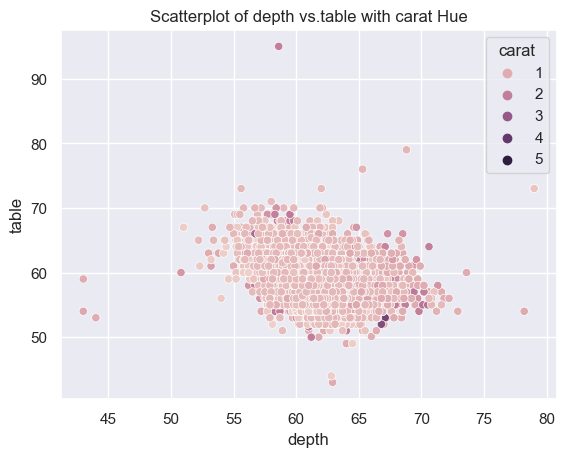

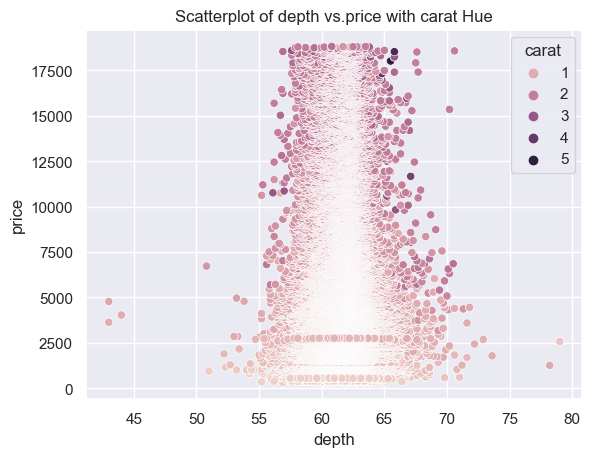

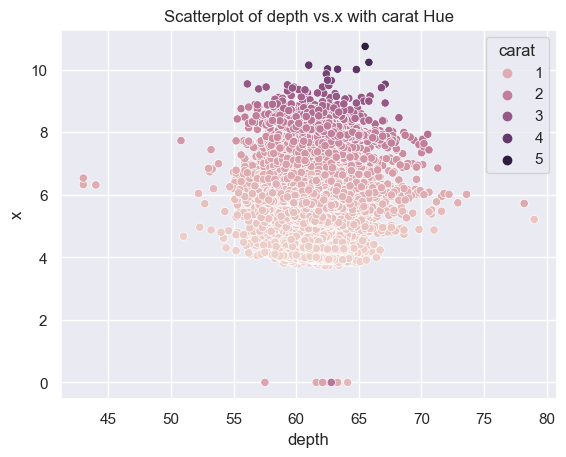

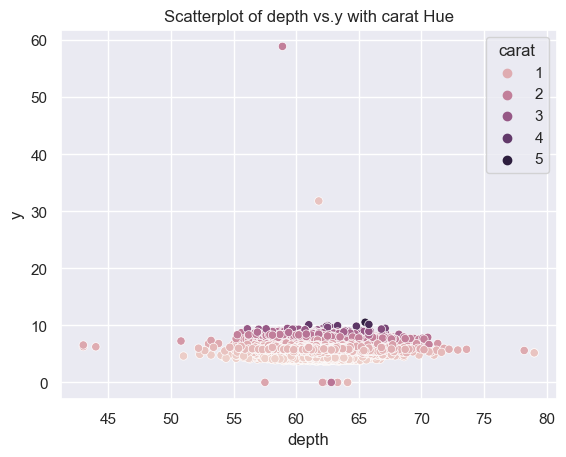

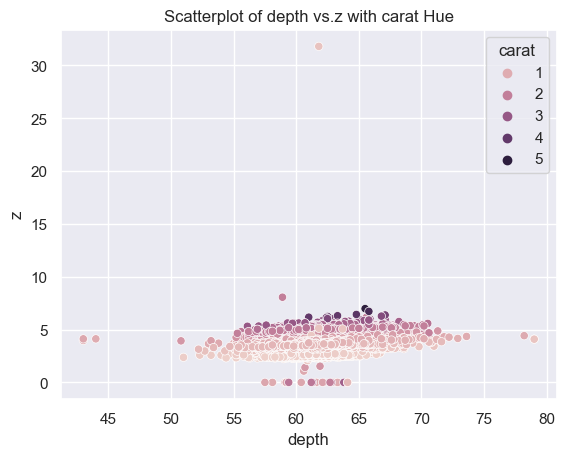

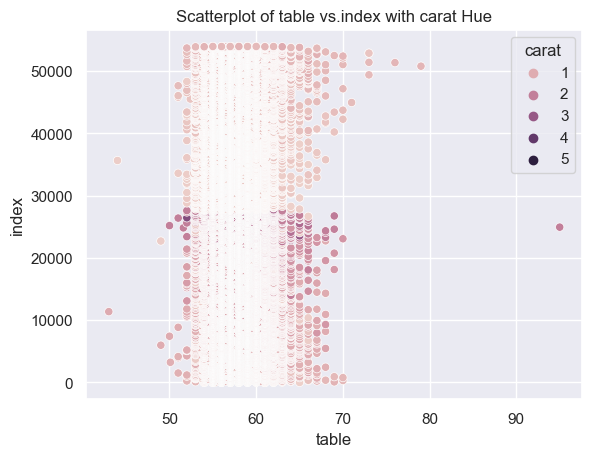

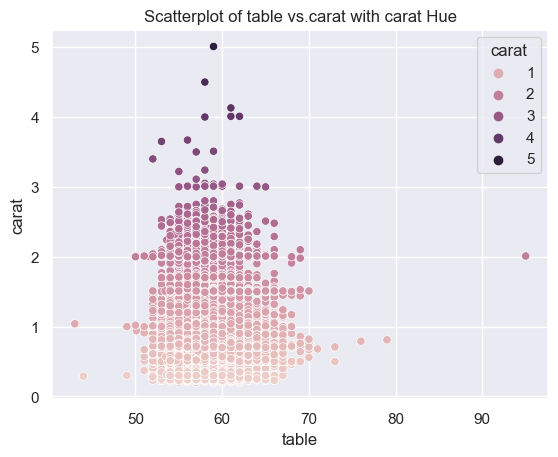

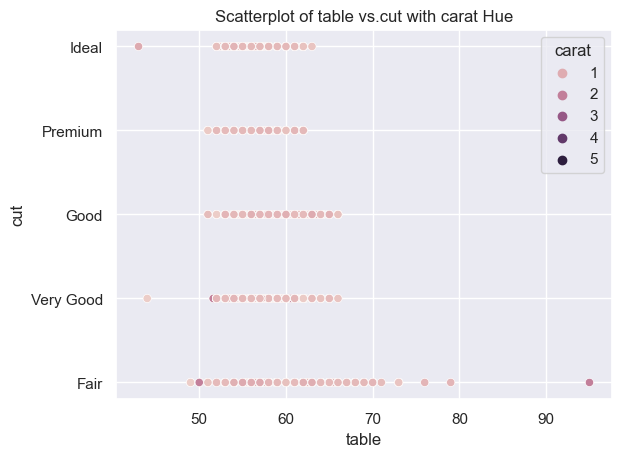

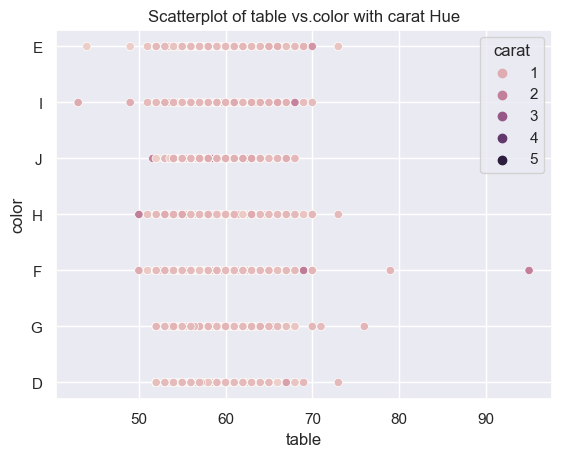

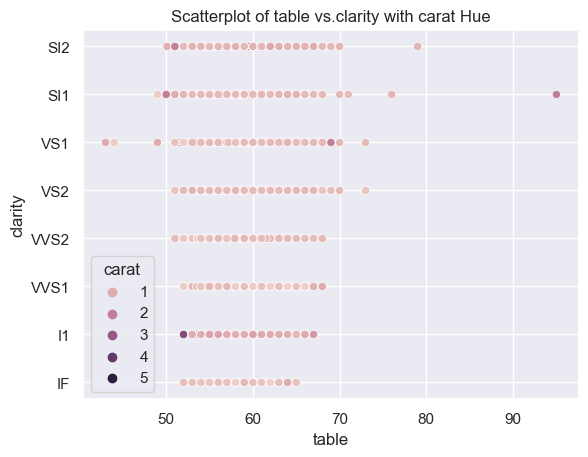

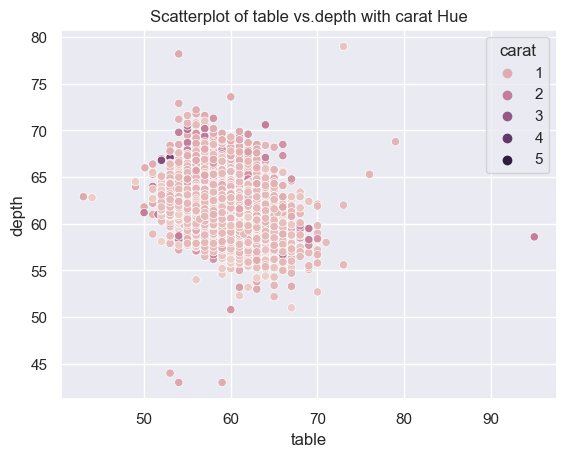

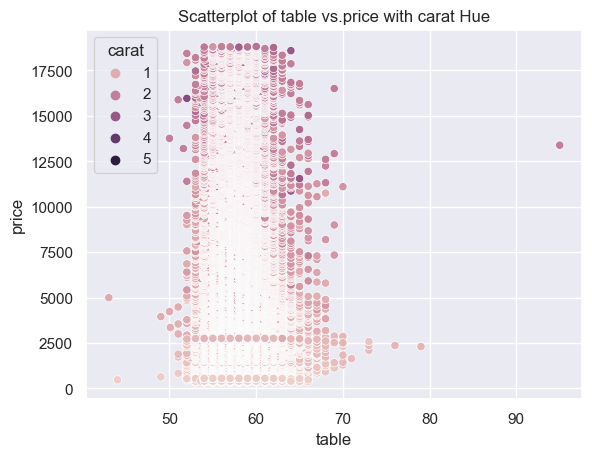

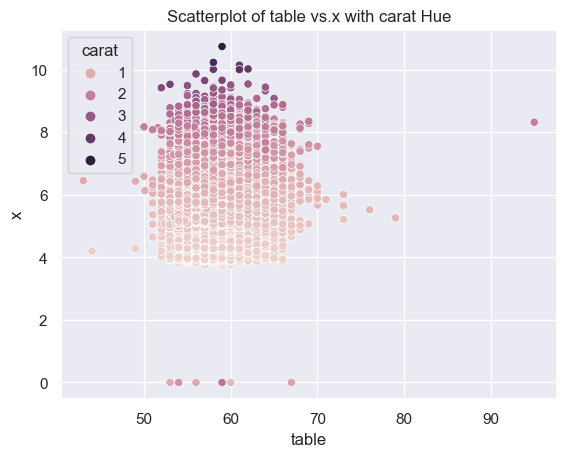

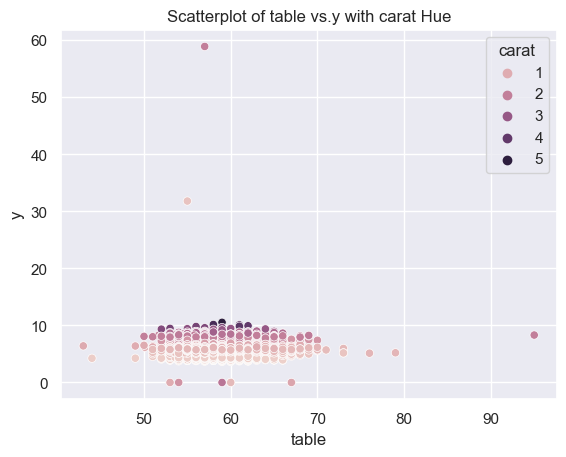

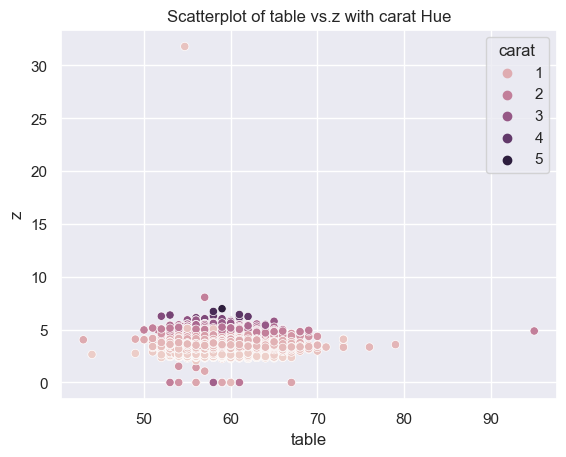

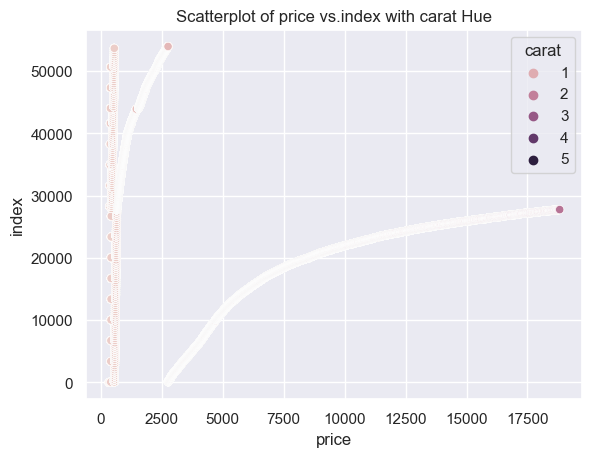

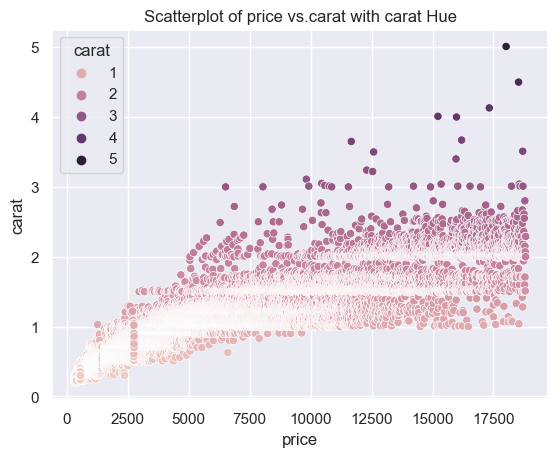

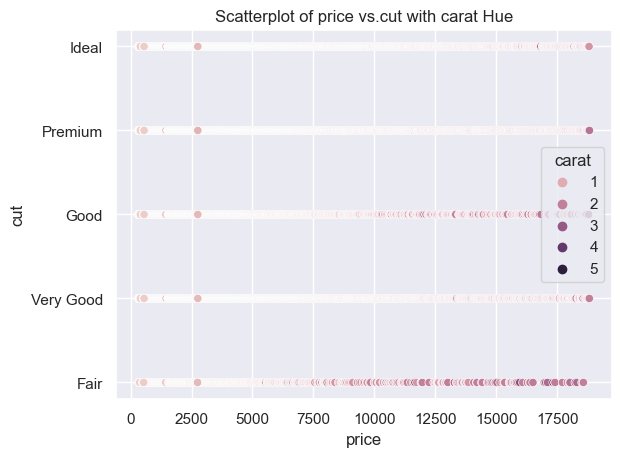

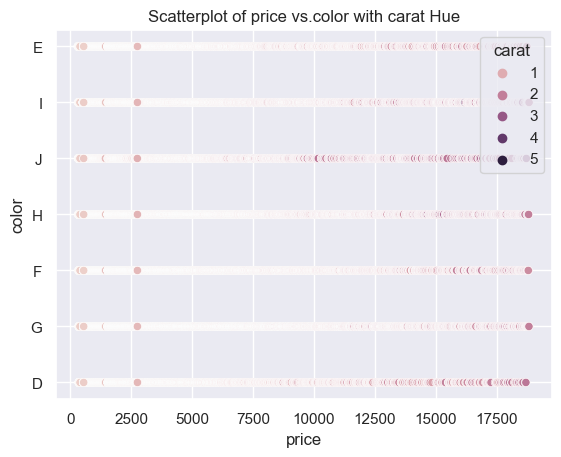

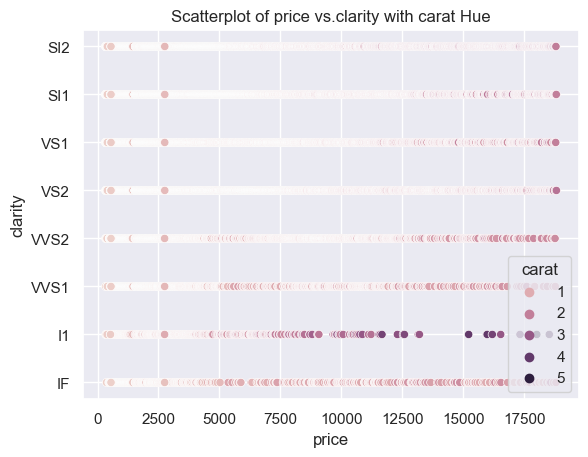

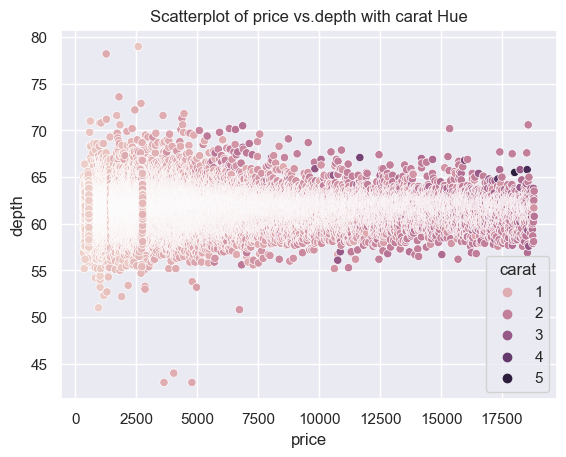

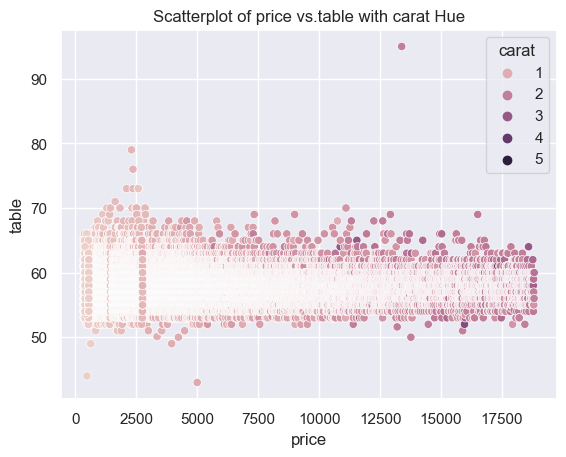

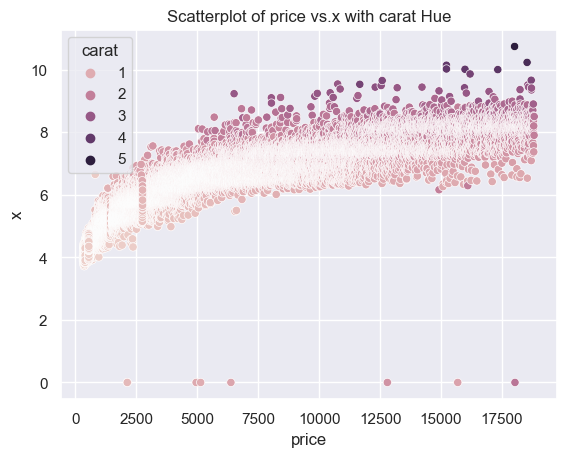

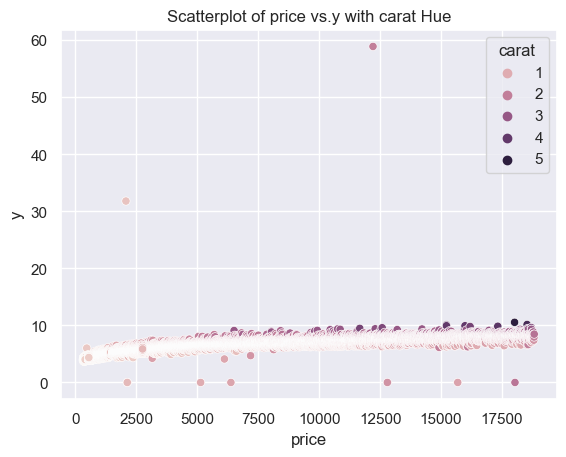

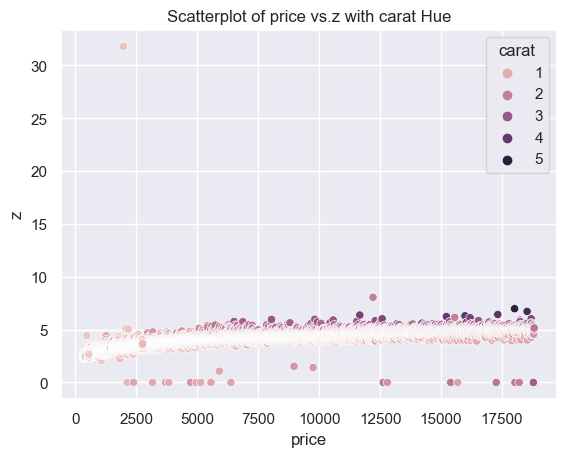

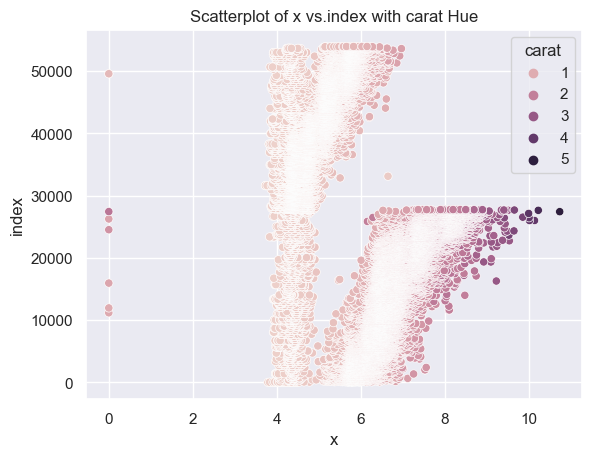

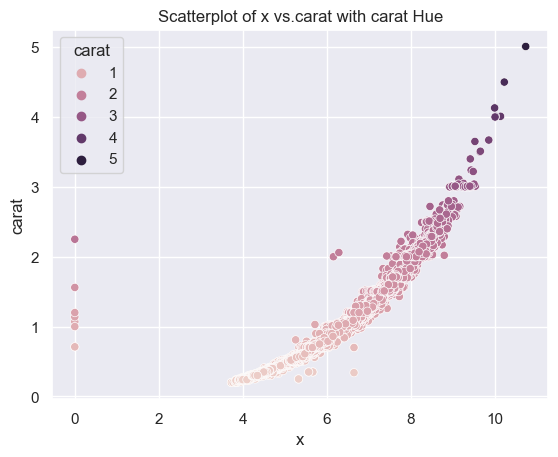

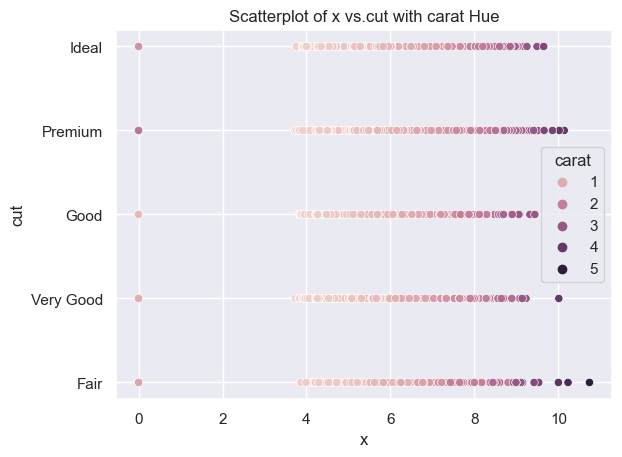

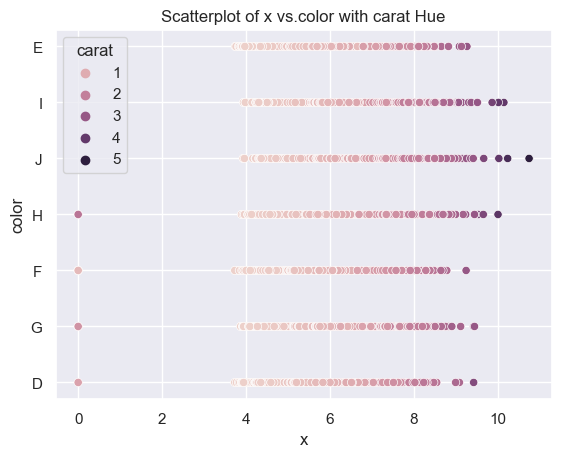

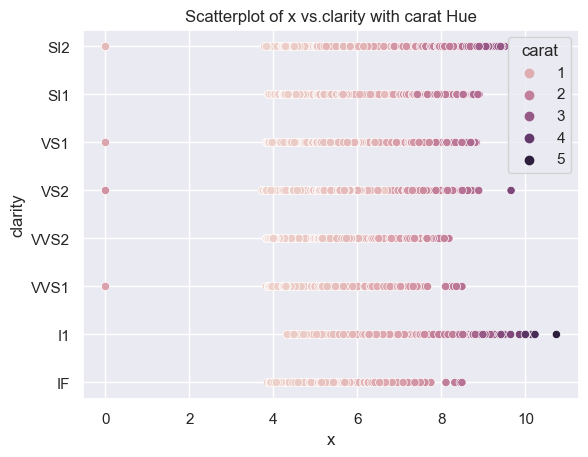

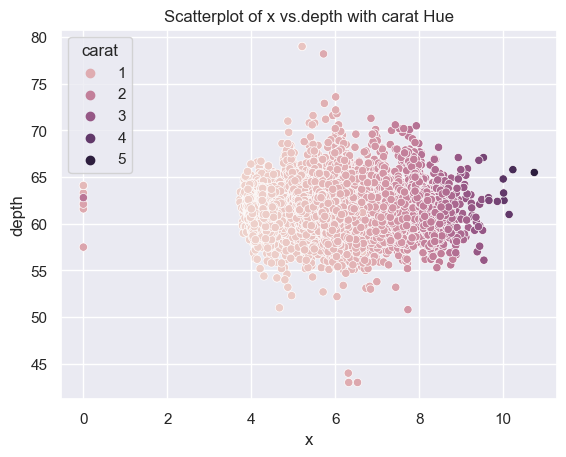

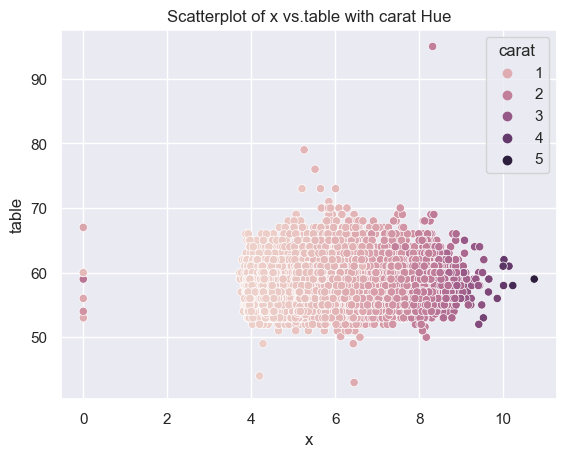

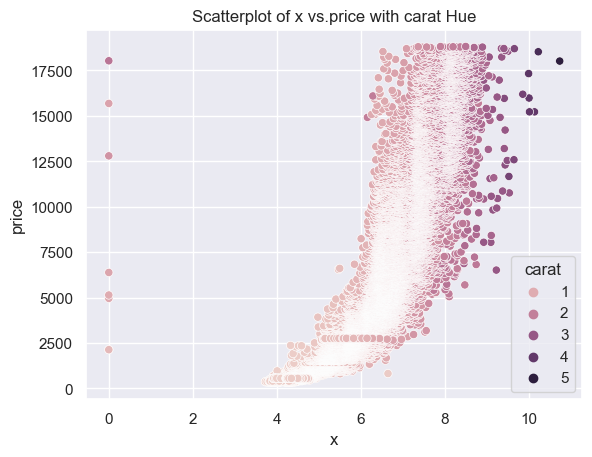

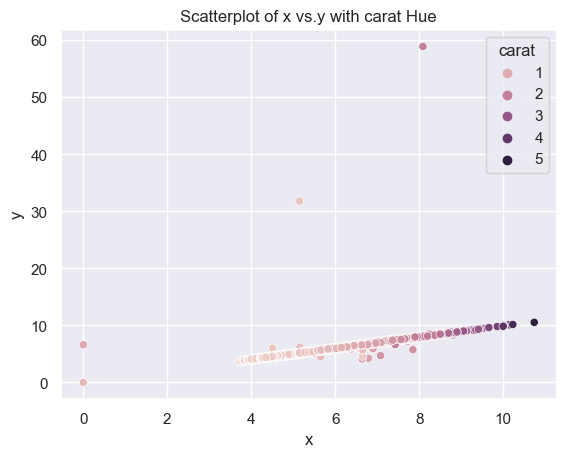

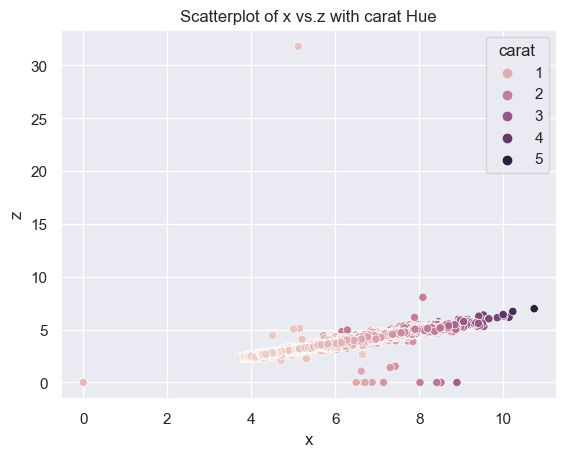

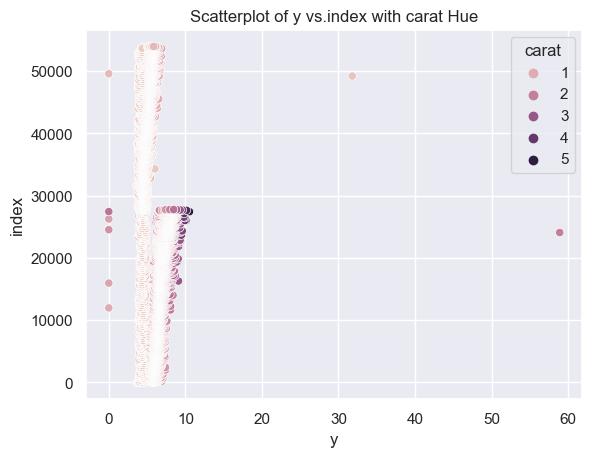

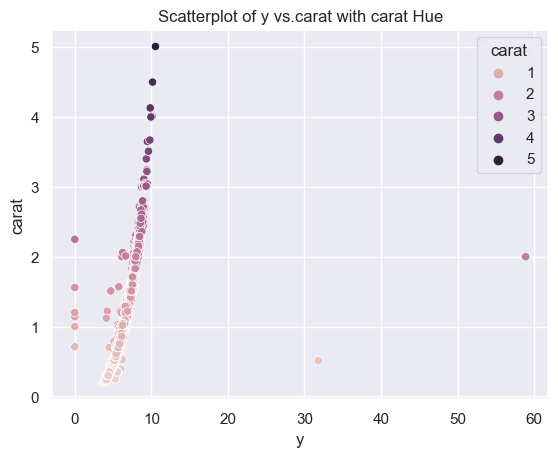

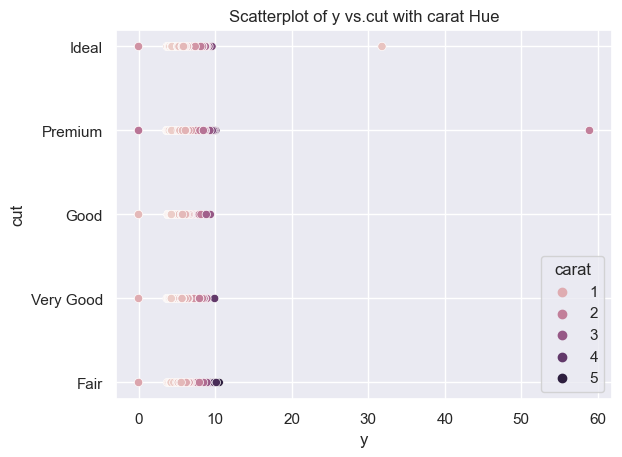

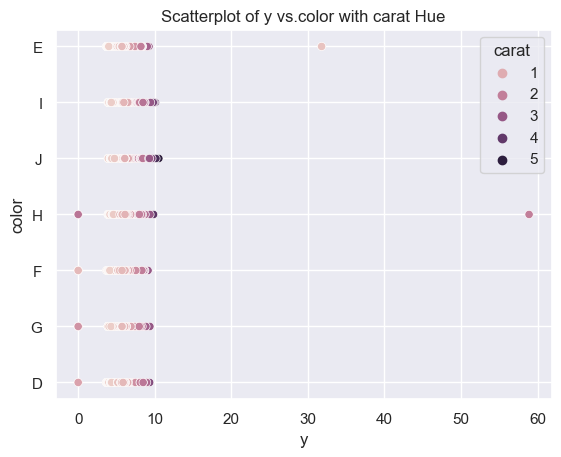

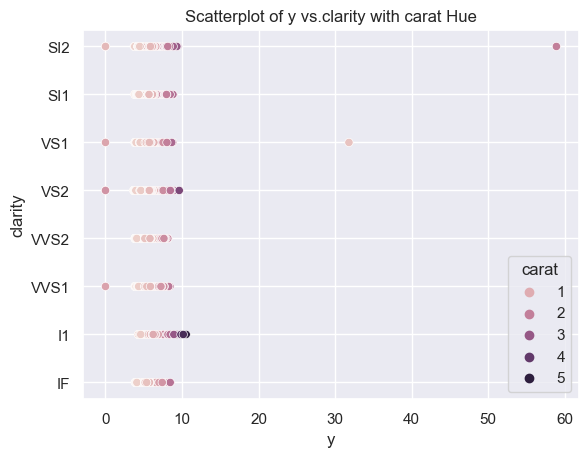

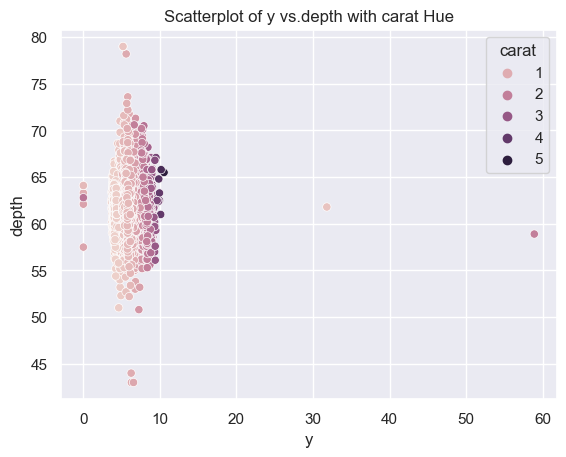

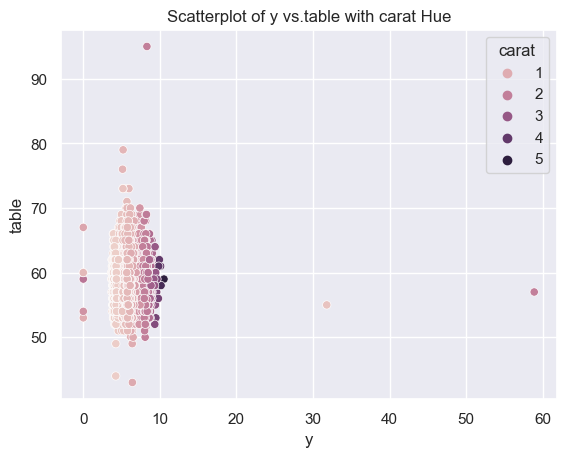

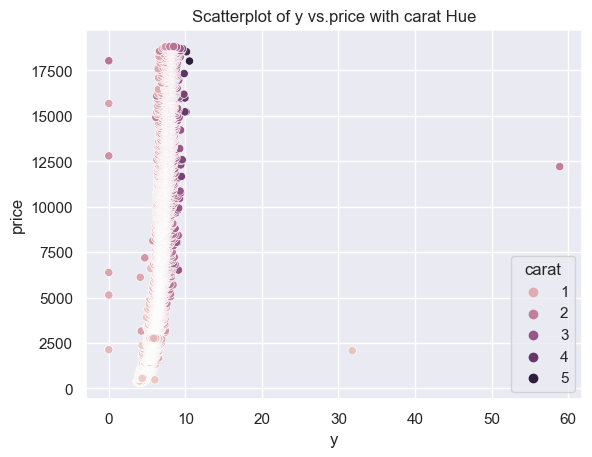

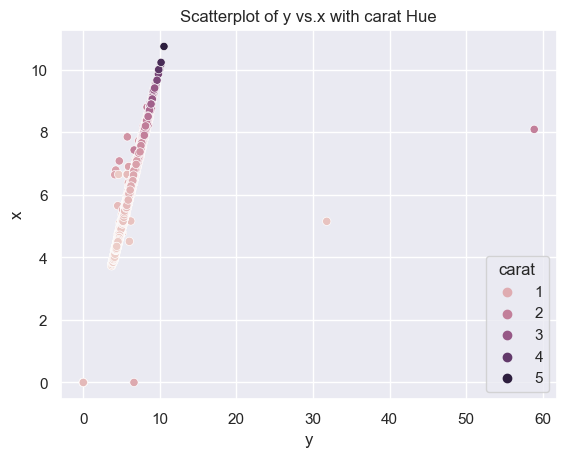

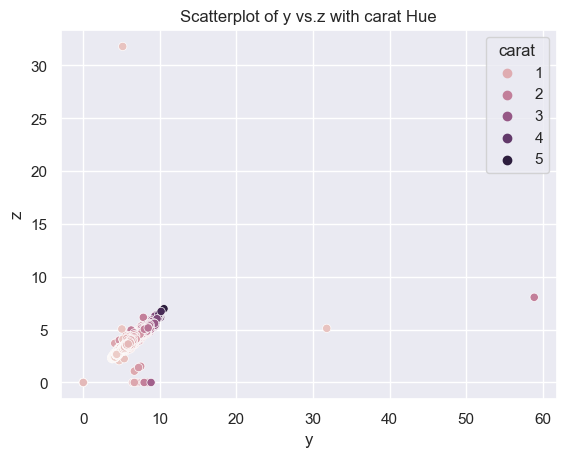

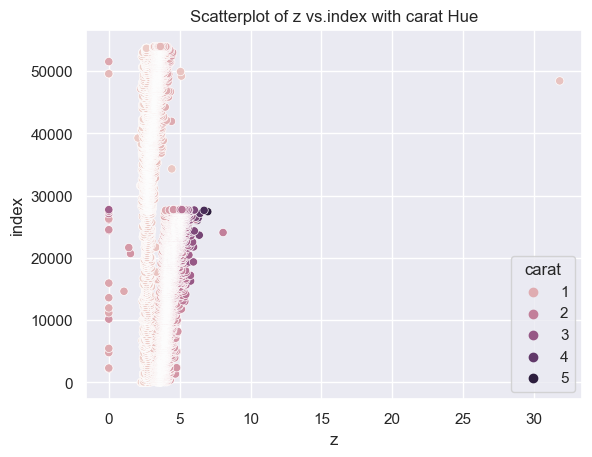

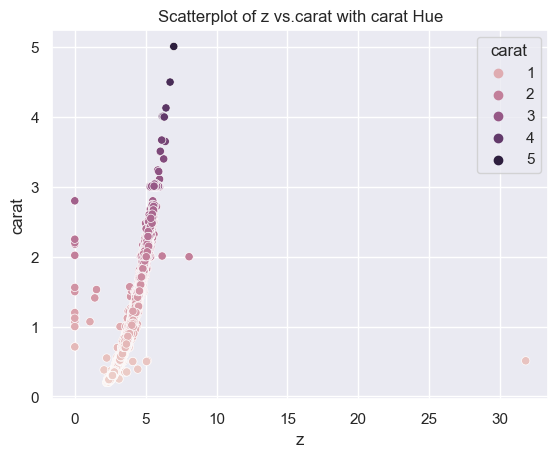

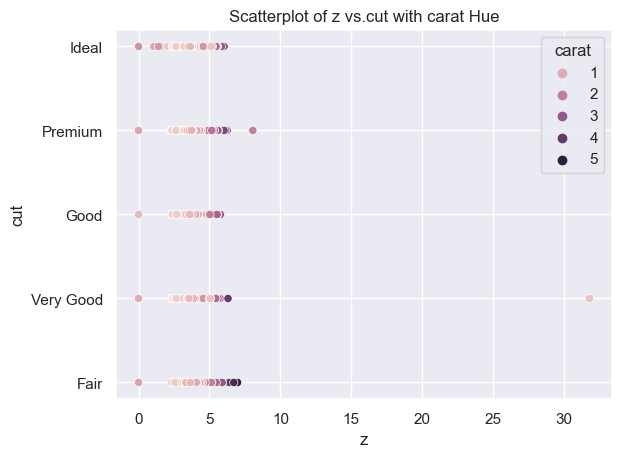

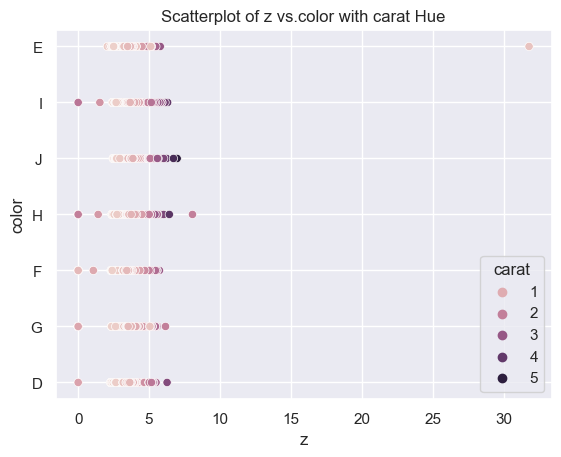

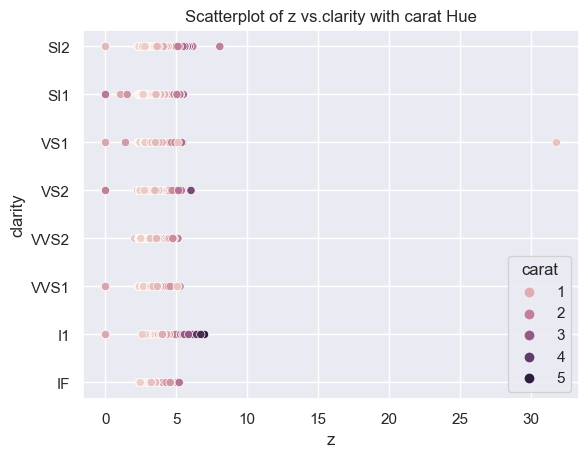

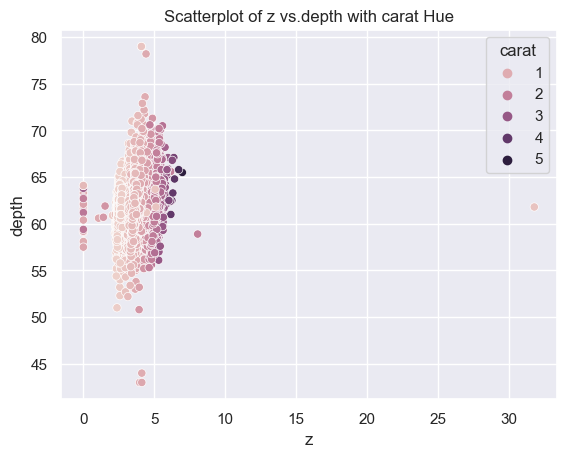

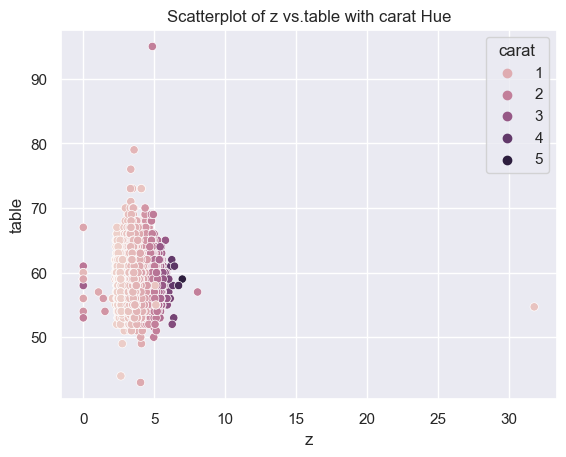

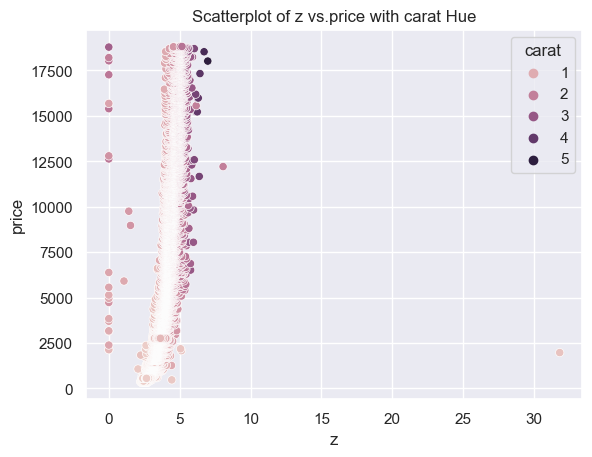

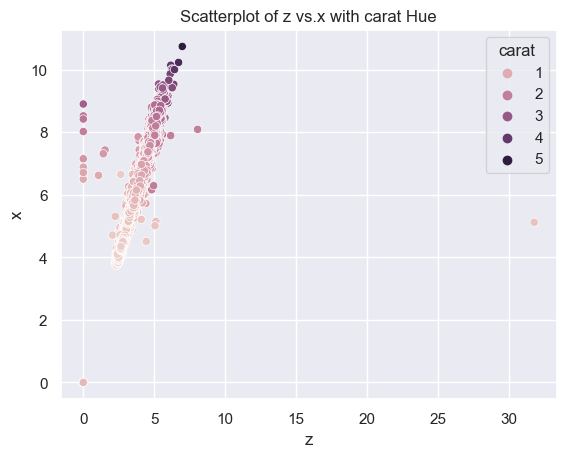

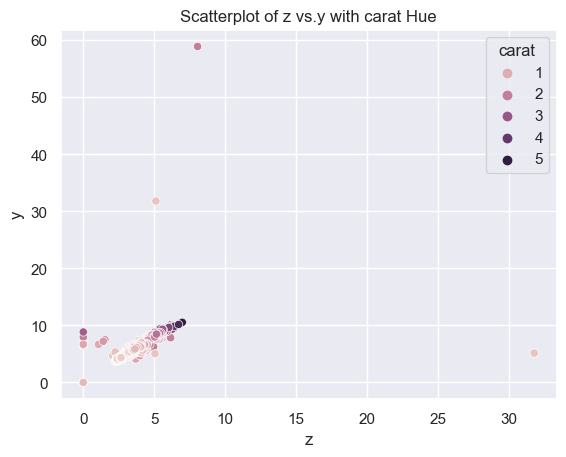

In [20]:
for column in df.columns:
    for y in df.columns:
        if column!= y: 
            sns.scatterplot(x=column, y=y, hue='carat', data=df)
            plt.title(f'Scatter plot for {column} vs {y}')
            
            plt.title(f'Scatterplot of {column} vs.{y} with carat Hue')
            plt.show()

<Axes: xlabel='cut', ylabel='count'>

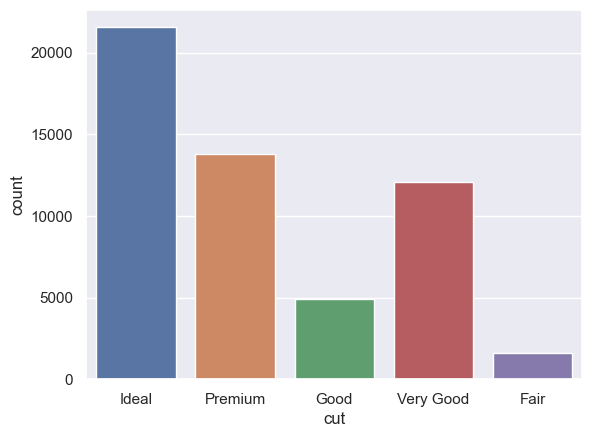

In [21]:
sns.countplot(x=df['cut'])

<Axes: xlabel='carat', ylabel='count'>

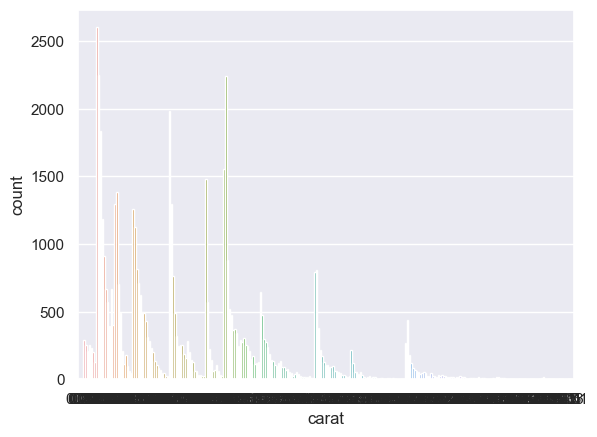

In [22]:
sns.countplot(x=df['carat'])

In [23]:
df.columns

Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [ ]:
for col in df.columns:
    sns.countplot(x=col,data=df)

In [ ]:
sns.distplot(df['price'])

In [ ]:
plt.figure(figsize=(14, 8))
for col in df.columns:
    for a in df.columns:
        sns.barplot(x=col, y=a, data=df)
        plt.title(f'Barplot of {col} vs. {a}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


In [ ]:
plt.style.use("seaborn-dark")

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid')
sns.lineplot(x = 'carat', y = 'price',hue='cut', data = df, color = '#582707' , markers = '*',ci=False )

plt.xlabel('carat')

plt.ylabel('price')

plt.title('price of diamond for each carat')

plt.show( )

--INFERENCE--
      *We can see that if the carat of diamond increases then the cost of the diamond also increases.
      *

In [ ]:
plt.hist(df.price,bins = 10)

![Box-Plot-and-Whisker-Plot-2.png](attachment:Box-Plot-and-Whisker-Plot-2.png)

In [ ]:
sns.heatmap(df[df.describe().columns.to_list()].corr(),annot = True)

In [ ]:
df.columns

In [ ]:
sns.relplot(x='carat',y='price',hue='cut',style='color',data=df)

In [ ]:
feature=['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y','z'],

In [ ]:
sns.catplot(x='carat',y='price',data=df,kind='violin')

# Joint plot

In [ ]:
  sns.jointplot(x='carat',y='price',data=df,marginal_ticks =True)  

# Pairplot

Pairplot plots histogram plot at the diagonal element and scatterplot at non diagonal element

In [ ]:
sns.pairplot(df)

# Linear Regression and Relationship

In [ ]:
sns.regplot(x='carat',y='price',data=df,color='Blue')        

In [ ]:
sns.lmplot(x='carat',y='price',hue='cut',data=df)

# Preprocessing

In [ ]:
#Removing Rows with Zero Values
def drop_rows_with_zero(df, col):
    index = df[df[col] == 0].index
    return df.drop(index, inplace=False)

df = drop_rows_with_zero(df, 'x')
df = drop_rows_with_zero(df, 'z')

In [ ]:
df= df.drop_duplicates(keep='first')

In [ ]:
Y=df['price']
X= df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

Managing Missing values and feature engineering in both groups of categorical and numerical features

In [ ]:
def encode_categorical_features(df_train, df_test):

    for col in ['cut', 'color', 'clarity']:
        dummies = pd.get_dummies(df_train[col], dtype=int)
        df_train = pd.concat([df_train, dummies], axis=1)
        df_train = df_train.drop(labels=col, axis=1)
        dummies = pd.get_dummies(df_test[col], dtype=int)
        df_test = pd.concat([df_test, dummies], axis=1)
        df_test = df_test.drop(labels=col, axis=1)
    return df_train, df_test

# Encode the categorical features in the training and test sets
X_train, X_test = encode_categorical_features(X_train, X_test)

In [ ]:
def drop_columns(df):
    return df.drop(labels=['x', 'y', 'z'], axis=1)

X_train = drop_columns(X_train)
X_test = drop_columns(X_test)

Scalling the dataset using StandardScaler

In [ ]:
scaler = StandardScaler()

X_T = X_test.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_T)

In [ ]:
df

In [ ]:
df.reset_index()

In [ ]:
new_df=df.copy(deep=True)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols(formula='carat~price',data=df).fit()

In [ ]:
print(model.summary())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit_transform(df)